In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image

from google.colab import drive
from IPython.display import display




In [ ]:
#  Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# 1. Load image
img_path = '/content/drive/MyDrive/peddet_2_1.jpg'
img = Image.open(img_path).convert('RGB')


In [ ]:
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from PIL import Image


# 2. Define preprocessing transform (same as DETR)
transform = Compose([
    Resize(800),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img_tensor = transform(img).unsqueeze(0)  # Shape: [1, 3, H, W]

# 3. Load DETR model
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval()

# 4. Hook to capture input_proj output
input_proj_output = None

def hook_fn(module, input, output):
    global input_proj_output
    input_proj_output = output.detach().clone()

hook_handle = model.input_proj.register_forward_hook(hook_fn)

# 5. Forward pass
with torch.no_grad():
    outputs = model(img_tensor)

# 6. Remove hook
hook_handle.remove()

# 7. Save captured tensor
save_path = '/content/drive/MyDrive/input_proj_output.pt'
torch.save(input_proj_output, save_path)
print(f"Saved tensor shape: {input_proj_output.shape}, dtype: {input_proj_output.dtype}")


Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 130MB/s]
Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache

Saved tensor shape: torch.Size([1, 256, 25, 45]), dtype: torch.float32


In [ ]:
trans_input = input_proj_output.flatten(2).permute(2, 0, 1)

In [ ]:

print("trans_input shape:", trans_input.shape)


trans_input shape: torch.Size([1125, 1, 256])


In [ ]:

print(trans_input)

tensor([[[-0.0811,  0.1507,  0.3771,  ...,  0.1229,  0.1999, -0.2595]],

        [[-0.3752, -0.0324,  0.1213,  ...,  0.3738, -0.3401,  0.3292]],

        [[-0.4590,  0.0367,  0.0960,  ...,  0.2164, -0.1534,  0.2898]],

        ...,

        [[ 0.3558,  0.2100,  0.8655,  ...,  0.2736, -0.5163, -0.5841]],

        [[ 0.8449,  0.1120,  0.8852,  ..., -0.0561, -1.1270, -0.3020]],

        [[ 1.0754,  0.0745,  0.1408,  ..., -0.3629,  0.0586, -0.8159]]])


In [ ]:
import torch



# Get the first row
first_row = trans_input[0]  # shape: [1, 256]

# Optionally remove singleton dimension
first_row_flat = first_row.squeeze(0)  # shape: [256]

# Save to file
torch.save(first_row_flat, 'first_row.pt')


tensor([-8.1143e-02,  1.5069e-01,  3.7711e-01, -2.6487e-01, -4.4960e-01,
        -2.5865e-01, -3.5725e-01, -7.1608e-01,  6.7728e-01, -1.0217e+00,
         2.5016e-01,  9.5692e-02,  7.6058e-01, -6.4650e-01,  9.2606e-01,
        -3.5868e-01,  9.2231e-02, -6.2567e-01,  1.0385e+00, -2.3602e-01,
        -6.3940e-01,  7.0538e-02,  5.0136e-01, -3.9190e-02,  7.5515e-01,
         1.8252e+00, -7.2608e-02, -4.7539e-01,  7.6814e-01, -3.3236e-01,
        -2.5160e-01, -1.0665e+00, -1.5375e+00,  7.9019e-01, -3.2015e+00,
         6.9856e-03,  1.7601e+00, -1.4419e+00, -1.6012e+00, -3.4537e-01,
        -2.1326e-01,  1.3559e+00, -9.0656e-01, -2.6996e-01, -1.2283e-01,
        -3.0356e-01, -3.8292e-01,  4.4878e-01,  1.3780e-01,  4.1947e-02,
         1.3069e-01, -1.4255e-02, -8.7114e-02, -1.8953e-01, -1.0273e-01,
        -5.0891e-02, -3.4500e-01, -1.7048e-01,  4.3263e-01,  3.8520e-01,
         1.9060e-01,  3.3496e-01,  1.4915e+00,  4.8724e-01,  3.4242e-01,
         7.9864e-01,  2.2099e-01,  1.0941e+00, -7.3

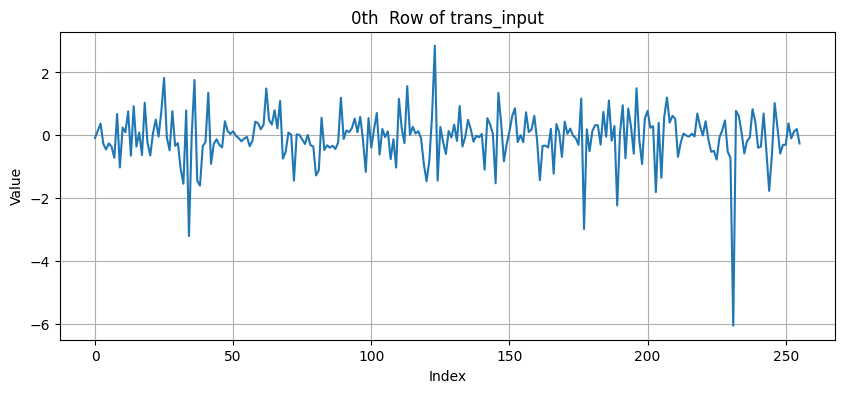

In [ ]:
import matplotlib.pyplot as plt

# Load the saved tensor
first_row_loaded = torch.load('first_row.pt')

# Convert to NumPy for plotting
data = first_row_loaded.numpy()
print(first_row_flat)
# Plot
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('0th  Row of trans_input')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


tensor([ 2.9923e+00,  8.8492e-01, -1.2346e+00, -1.6170e+00, -1.0009e+00,
         1.1687e+00,  4.6513e-01,  6.4764e-01, -2.6395e-01,  1.9055e-01,
        -1.8649e+00, -2.5221e-01, -3.0151e-01,  2.4115e+00, -6.8024e-01,
         6.0513e-02,  5.5414e-01, -4.6923e-01, -1.6369e+00, -1.7551e+00,
        -7.9539e-02,  1.7115e+00,  7.0996e-01,  1.9282e-01,  1.0878e+00,
        -2.0089e+00, -1.9717e+00, -6.1863e-01,  1.9213e-01,  1.8226e+00,
        -2.8250e-01,  1.2331e+00, -5.8953e-01,  2.3540e-01,  1.1683e+00,
         1.8420e-01, -8.8187e-01, -1.3050e+00,  7.1962e-01,  6.7778e-01,
        -6.3209e-01,  3.0000e+00, -5.7720e-01, -9.6622e-01,  2.0799e-01,
         4.4346e-01, -2.9550e-01,  1.4016e+00, -3.5302e-01, -1.5735e+00,
        -1.4230e+00,  2.5620e-01, -1.6291e+00,  2.9925e+00,  6.7770e-01,
         1.3437e+00, -5.5935e-01,  1.1111e+00, -4.5008e-02, -2.3776e+00,
        -6.2827e-02, -1.6803e+00,  8.1887e-01,  4.0262e+00,  1.7779e+00,
        -1.1377e+00, -2.7270e+00, -2.1025e+00, -1.3

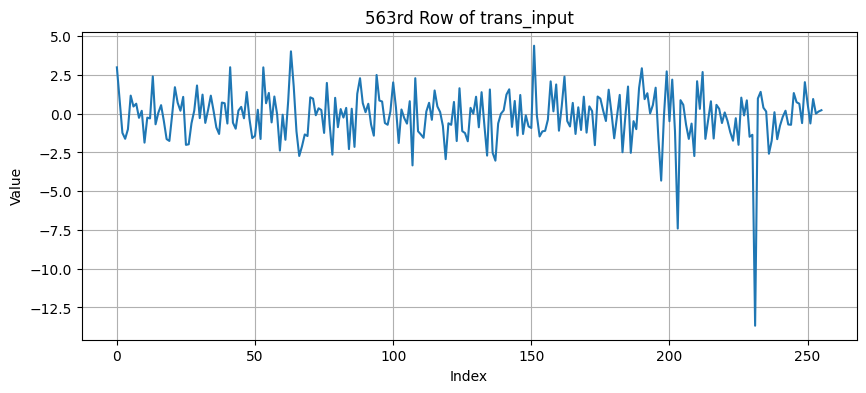

In [ ]:
import torch



# Get the first row
row563 = trans_input[563]  # shape: [1, 256]

# Optionally remove singleton dimension
row563_flat = row563.squeeze(0)  # shape: [256]

# Save to file
torch.save(row563_flat, 'row563.pt')

import matplotlib.pyplot as plt

# Load the saved tensor
row563_loaded = torch.load('row563.pt')

# Convert to NumPy for plotting
data = row563_loaded.numpy()
print(row563_flat)
# Plot
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('563rd Row of trans_input')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


tensor([ 1.0754e+00,  7.4497e-02,  1.4083e-01, -4.9832e-01, -4.5683e-01,
         1.3729e-01, -4.3635e-01, -7.6783e-01, -4.4010e-01, -6.7828e-01,
        -5.1179e-01,  4.0075e-01,  7.8040e-01,  4.5006e-01, -7.2542e-01,
        -8.3885e-01,  4.5894e-01, -1.4501e-01,  5.8907e-01, -2.0520e-01,
        -5.8275e-01,  4.1303e-01,  3.4446e-01,  1.1487e+00, -1.3180e-01,
         2.1547e+00, -7.2751e-01,  3.5820e-01, -2.9328e-01, -8.7451e-01,
        -2.1905e-01, -6.3253e-01, -1.8835e+00, -3.3127e-02, -3.0677e+00,
        -3.8491e-01,  1.1491e+00, -2.0822e+00, -2.3411e+00, -4.9529e-01,
        -8.9078e-01,  1.9289e+00, -1.2033e+00, -1.2625e+00,  1.7794e-01,
        -6.7648e-01,  2.6225e-01,  6.7068e-02,  2.8093e-01,  9.3431e-01,
        -7.6412e-01, -7.7184e-01,  7.9738e-01, -1.0261e-01, -1.2342e+00,
        -3.7458e-01, -6.8953e-01,  8.3890e-01,  2.7701e-02,  3.9235e+00,
        -5.7391e-01, -1.2310e-01,  2.4565e+00,  1.3185e+00,  9.4430e-01,
         1.2298e+00,  1.3097e-01,  6.3758e-02,  3.2

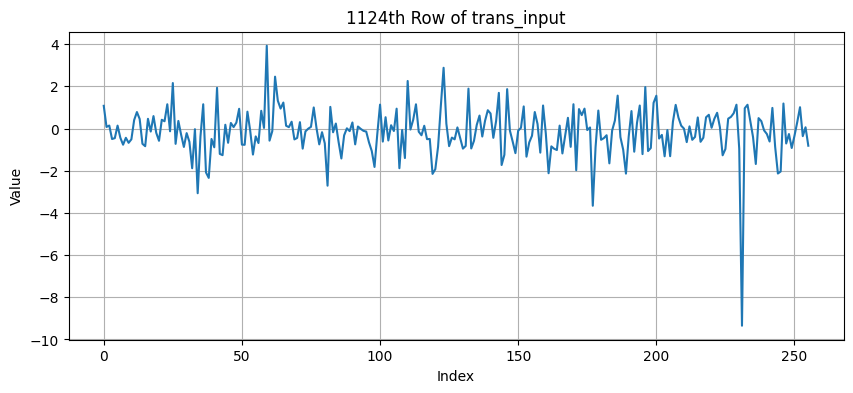

In [ ]:
import torch



# Get the first row
row1124 = trans_input[1124]  # shape: [1, 256]

# Optionally remove singleton dimension
row1124_flat = row1124.squeeze(0)  # shape: [256]

# Save to file
torch.save(row1124_flat, 'row563.pt')

import matplotlib.pyplot as plt

# Load the saved tensor
row1124_loaded = torch.load('row563.pt')

# Convert to NumPy for plotting
data = row1124_loaded.numpy()
print(row1124_flat)
# Plot
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('1124th Row of trans_input')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import math

# Positional Embedding class (DETR-style)
class PositionEmbeddingSine(nn.Module):
    def __init__(self, num_pos_feats=128, temperature=10000, normalize=True, scale=2*math.pi):
        super().__init__()
        self.num_pos_feats = num_pos_feats
        self.temperature = temperature
        self.normalize = normalize
        self.scale = scale

    def forward(self, x):
        bs, c, h, w = x.shape
        mask = torch.zeros((bs, h, w), dtype=torch.bool, device=x.device)
        not_mask = ~mask
        y_embed = not_mask.cumsum(1, dtype=torch.float32)
        x_embed = not_mask.cumsum(2, dtype=torch.float32)

        if self.normalize:
            eps = 1e-6
            y_embed = y_embed / (y_embed[:, -1:, :] + eps) * self.scale
            x_embed = x_embed / (x_embed[:, :, -1:] + eps) * self.scale

        dim_t = torch.arange(self.num_pos_feats, dtype=torch.float32, device=x.device)
        dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)

        pos_x = x_embed[:, :, :, None] / dim_t
        pos_y = y_embed[:, :, :, None] / dim_t

        pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)

        pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)

        # Save full positional encodings for y and x for i = 0
        pos_y_encoding = pos_y[0].permute(2, 0, 1)  # [H, W, C] -> [C, H, W]
        pos_x_encoding = pos_x[0].permute(2, 0, 1)  # [H, W, C] -> [C, H, W]

        return pos, pos_y_encoding, pos_x_encoding

# Dummy input feature map [B, C, H, W]
dummy_feature_map = torch.randn(1, 256, 25, 45)
position_embedding = PositionEmbeddingSine(num_pos_feats=128, normalize=True)

# Forward pass to get positional encodings and separated x/y encodings
pos_embed, saved_pos_y, saved_pos_x = position_embedding(dummy_feature_map)

# Print outputs
print("Positional Embedding Shape:", pos_embed.shape)  # [1, 256, 25, 45]
print("Saved Positional Encoding y Shape:", saved_pos_y.shape)  # [128, 25, 45]
print("Saved Positional Encoding x Shape:", saved_pos_x.shape)  # [128, 25, 45]

print("Saved Positional Encoding y:\n", saved_pos_y)
print("--------------------------------------------------------------------------------")
print("Saved Positional Encoding x:\n", saved_pos_x)


Positional Embedding Shape: torch.Size([1, 256, 25, 45])
Saved Positional Encoding y Shape: torch.Size([128, 25, 45])
Saved Positional Encoding x Shape: torch.Size([128, 25, 45])
Saved Positional Encoding y:
 tensor([[[ 2.4869e-01,  2.4869e-01,  2.4869e-01,  ...,  2.4869e-01,
           2.4869e-01,  2.4869e-01],
         [ 4.8175e-01,  4.8175e-01,  4.8175e-01,  ...,  4.8175e-01,
           4.8175e-01,  4.8175e-01],
         [ 6.8455e-01,  6.8455e-01,  6.8455e-01,  ...,  6.8455e-01,
           6.8455e-01,  6.8455e-01],
         ...,
         [-4.8175e-01, -4.8175e-01, -4.8175e-01,  ..., -4.8175e-01,
          -4.8175e-01, -4.8175e-01],
         [-2.4869e-01, -2.4869e-01, -2.4869e-01,  ..., -2.4869e-01,
          -2.4869e-01, -2.4869e-01],
         [-3.0199e-07, -3.0199e-07, -3.0199e-07,  ..., -3.0199e-07,
          -3.0199e-07, -3.0199e-07]],

        [[ 9.6858e-01,  9.6858e-01,  9.6858e-01,  ...,  9.6858e-01,
           9.6858e-01,  9.6858e-01],
         [ 8.7631e-01,  8.7631e-01,  8.7

In [ ]:
trans_pe = pos_embed.flatten(2).permute(2, 0, 1)
print("trans_pe shape:", trans_pe.shape)
print(trans_pe)

trans_pe shape: torch.Size([1125, 1, 256])
tensor([[[ 2.4869e-01,  9.6858e-01,  2.1593e-01,  ...,  1.0000e+00,
           1.6124e-05,  1.0000e+00]],

        [[ 2.4869e-01,  9.6858e-01,  2.1593e-01,  ...,  1.0000e+00,
           3.2248e-05,  1.0000e+00]],

        [[ 2.4869e-01,  9.6858e-01,  2.1593e-01,  ...,  1.0000e+00,
           4.8371e-05,  1.0000e+00]],

        ...,

        [[-3.0199e-07,  1.0000e+00, -7.4609e-01,  ...,  1.0000e+00,
           6.9332e-04,  1.0000e+00]],

        [[-3.0199e-07,  1.0000e+00, -7.4609e-01,  ...,  1.0000e+00,
           7.0945e-04,  1.0000e+00]],

        [[-3.0199e-07,  1.0000e+00, -7.4609e-01,  ...,  1.0000e+00,
           7.2557e-04,  1.0000e+00]]])


In [ ]:
input_w_pos = trans_input + trans_pe

In [ ]:
print(input_w_pos)

tensor([[[ 0.1675,  1.1193,  0.5930,  ...,  1.1229,  0.1999,  0.7405]],

        [[-0.1266,  0.9362,  0.3373,  ...,  1.3738, -0.3401,  1.3292]],

        [[-0.2103,  1.0053,  0.3120,  ...,  1.2164, -0.1534,  1.2898]],

        ...,

        [[ 0.3558,  1.2100,  0.1194,  ...,  1.2736, -0.5156,  0.4159]],

        [[ 0.8449,  1.1120,  0.1391,  ...,  0.9439, -1.1263,  0.6980]],

        [[ 1.0754,  1.0745, -0.6053,  ...,  0.6371,  0.0593,  0.1841]]])


In [ ]:
print(input_w_pos.shape)

torch.Size([1125, 1, 256])


0th row :
tensor([ 1.6755e-01,  1.1193e+00,  5.9304e-01,  7.1154e-01, -2.6224e-01,
         7.2364e-01, -1.9477e-01,  2.7064e-01,  8.1814e-01, -3.1622e-02,
         3.7224e-01,  1.0882e+00,  8.6636e-01,  3.4789e-01,  1.0177e+00,
         6.3711e-01,  1.7162e-01,  3.7117e-01,  1.1073e+00,  7.6162e-01,
        -5.7984e-01,  1.0688e+00,  5.5295e-01,  9.5948e-01,  7.9983e-01,
         2.8242e+00, -3.3915e-02,  5.2386e-01,  8.0165e-01,  6.6707e-01,
        -2.2258e-01, -6.6884e-02, -1.5124e+00,  1.7899e+00, -3.1797e+00,
         1.0067e+00,  1.7790e+00, -4.4203e-01, -1.5849e+00,  6.5450e-01,
        -1.9913e-01,  2.3558e+00, -8.9432e-01,  7.2996e-01, -1.1223e-01,
         6.9638e-01, -3.7374e-01,  1.4487e+00,  1.4575e-01,  1.0419e+00,
         1.3757e-01,  9.8572e-01, -8.1154e-02,  8.1045e-01, -9.7571e-02,
         9.4910e-01, -3.4053e-01,  8.2951e-01,  4.3650e-01,  1.3852e+00,
         1.9396e-01,  1.3350e+00,  1.4944e+00,  1.4872e+00,  3.4493e-01,
         1.7986e+00,  2.2317e-01,  2.0941

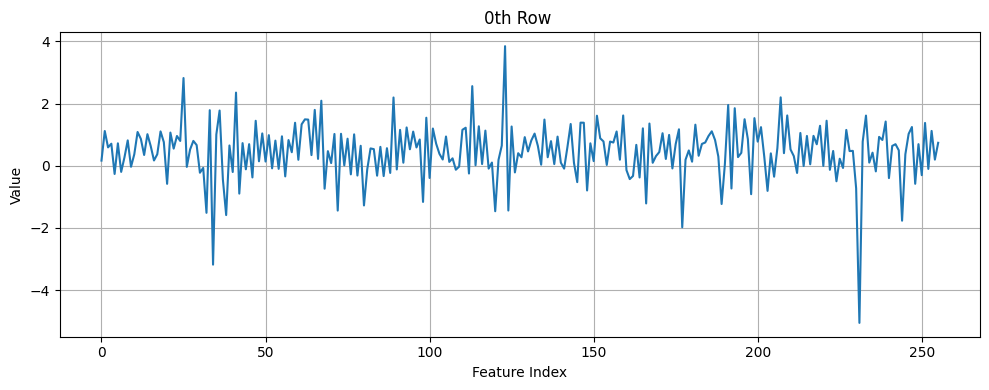

In [ ]:
import torch
import matplotlib.pyplot as plt


row_index = 0
selected_row = input_w_pos[row_index, 0, :]  # Shape: [256]

# Print it
print(f"{row_index}th row :")
print(selected_row)

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(selected_row.numpy())
plt.title(f"{row_index}th Row ")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


563th row:
tensor([ 2.8669e+00, -1.0719e-01, -9.2735e-01, -2.5687e+00, -3.6326e-01,
         3.9844e-01,  1.3172e+00,  1.2419e-01,  7.0075e-01, -7.2820e-02,
        -8.6507e-01, -2.7246e-01,  6.7992e-01,  2.6034e+00,  2.4928e-01,
         4.2928e-01,  1.4131e+00,  4.2848e-02, -8.5684e-01, -1.1294e+00,
         6.2003e-01,  2.4260e+00,  1.3317e+00,  9.7606e-01,  1.6367e+00,
        -1.1729e+00, -1.4896e+00,  2.5744e-01,  6.1418e-01,  2.7292e+00,
         8.5910e-02,  2.1627e+00, -2.6859e-01,  1.1825e+00,  1.4474e+00,
         1.1444e+00, -6.3930e-01, -3.3485e-01,  9.3020e-01,  1.6554e+00,
        -4.4939e-01,  3.9831e+00, -4.1876e-01,  2.1147e-02,  3.4533e-01,
         1.4340e+00, -1.7647e-01,  2.3945e+00, -2.4988e-01, -5.7885e-01,
        -1.3336e+00,  1.2522e+00, -1.5517e+00,  3.9895e+00,  7.4474e-01,
         2.3415e+00, -5.0128e-01,  2.1094e+00,  5.2837e-03, -1.3788e+00,
        -1.9271e-02, -6.8128e-01,  8.5659e-01,  5.0255e+00,  1.8106e+00,
        -1.3827e-01, -2.6987e+00, -1.102

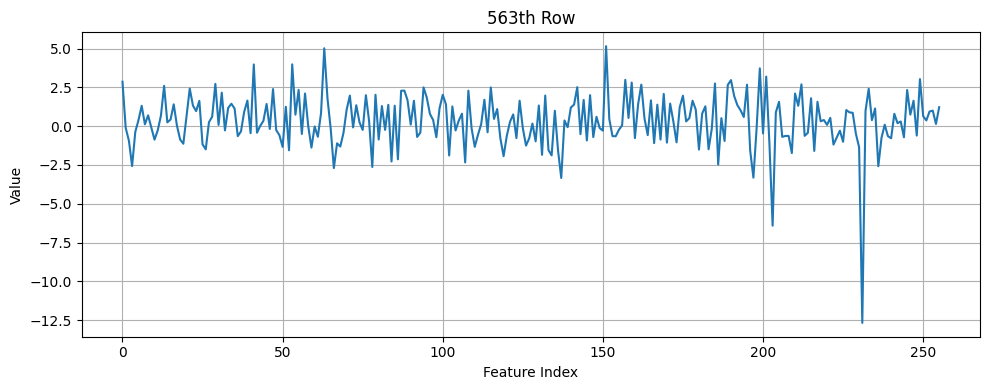

In [ ]:
import torch
import matplotlib.pyplot as plt


row_index = 563
selected_row = input_w_pos[row_index, 0, :]  # Shape: [256]

# Print it
print(f"{row_index}th row:")
print(selected_row)

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(selected_row.numpy())
plt.title(f"{row_index}th Row")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


1124th row:
tensor([ 1.0754,  1.0745, -0.6053,  0.1675, -1.4568,  0.1366, -1.2431, -1.3588,
        -0.8219, -1.6025, -0.4300, -0.5959,  1.2528, -0.4313,  0.0240, -1.5010,
         1.3736, -0.5492,  1.5779, -0.3544,  0.4140,  0.4938,  1.3054,  1.4256,
         0.7671,  2.5928,  0.0960,  0.9255,  0.4499, -0.2055,  0.4445,  0.1156,
        -1.2958,  0.7759, -2.5501,  0.4707,  1.6030, -1.1912, -1.9443,  0.4226,
        -0.5448,  2.8672, -0.9021, -0.3090,  0.4398,  0.2886,  0.4897,  1.0409,
         0.4783,  1.9146, -0.5929,  0.2134,  0.9458,  0.8863, -1.1055,  0.6171,
        -0.5780,  1.8327,  0.1243,  4.9189, -0.4902,  0.8734,  2.5290,  2.3159,
         1.0071,  2.2278,  0.1854,  1.0623,  0.3688,  0.4827, -0.4084,  1.2992,
        -0.9182,  0.8624,  0.0214,  1.0775,  1.0235,  1.0192, -0.7302,  0.8253,
        -0.6818, -1.7101,  1.0427,  0.8207,  0.2505,  0.3588, -1.4078,  0.6760,
         0.0196,  0.8759,  0.2953,  0.2484,  0.1032,  0.9827, -0.1038,  0.8533,
        -0.6532, -0.0659, -1

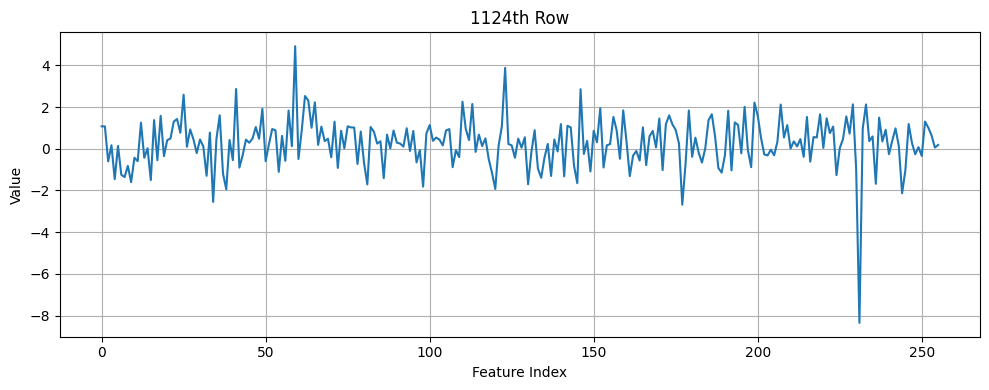

In [ ]:
import torch
import matplotlib.pyplot as plt


row_index = 1124
selected_row = input_w_pos[row_index, 0, :]  # Shape: [256]

# Print it
print(f"{row_index}th row:")
print(selected_row)

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(selected_row.numpy())
plt.title(f"{row_index}th Row")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


0th row of trans_pe:
tensor([0.2487, 0.9686, 0.2159, 0.9764, 0.1874, 0.9823, 0.1625, 0.9867, 0.1409,
        0.9900])


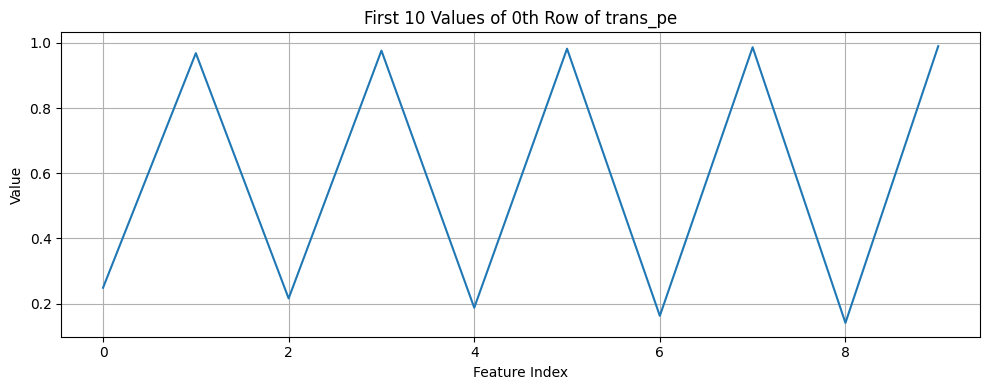

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming this is your actual tensor
# Shape: [1125, 1, 256]
# trans_pe = your tensor here

# Extract first row
first_row = trans_pe[0, 0, :]  # Shape: [256]

# Print it
print("0th row of trans_pe:")
print(first_row[:10])  # Print only first 10 values

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_row[:10].numpy())  # Slice here
plt.title("First 10 Values of 0th Row of trans_pe")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


First 10 values of the tensor:
[-0.08114317  0.15068807  0.37710872 -0.264871   -0.44959858 -0.25864732
 -0.35725215 -0.71607554  0.67728204 -1.0216514 ]


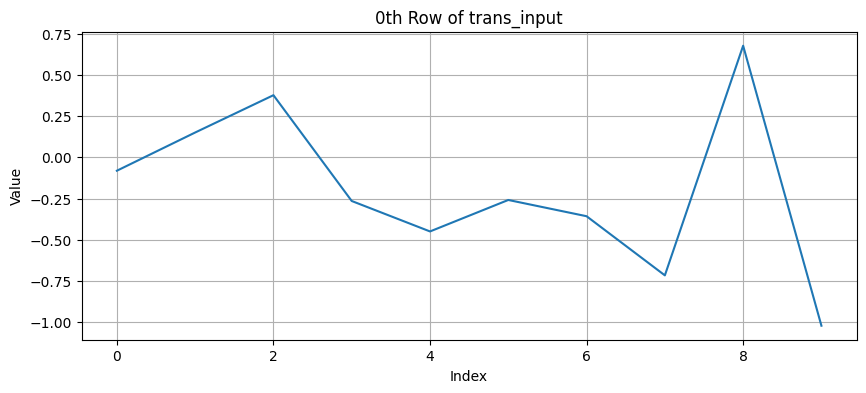

In [ ]:
import torch
import matplotlib.pyplot as plt

# Load the saved tensor
first_row_loaded = torch.load('first_row.pt')

# Convert to NumPy for plotting
data = first_row_loaded.numpy()

# Print only the first 10 values
print("First 10 values of the tensor:")
print(data[:10])

# Plot the entire tensor
plt.figure(figsize=(10, 4))

plt.plot(first_row_loaded[:10].numpy())  # Slice here
plt.title('0th Row of trans_input')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


0th row (first 10 values):
tensor([ 0.1675,  1.1193,  0.5930,  0.7115, -0.2622,  0.7236, -0.1948,  0.2706,
         0.8181, -0.0316])


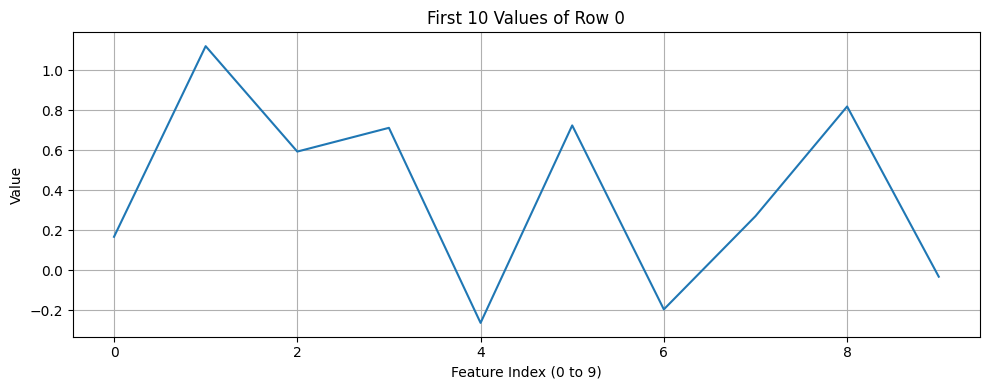

In [ ]:
import torch
import matplotlib.pyplot as plt

row_index = 0
selected_row = input_w_pos[row_index, 0, :]  # Shape: [256]

# Print it
print(f"{row_index}th row (first 10 values):")
print(selected_row[:10])  # Only print first 10 values

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(selected_row[:10].numpy())  # Slice first 10 values
plt.title(f"First 10 Values of Row {row_index}")
plt.xlabel("Feature Index (0 to 9)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


First 10 values of row 563 of trans_pe:
tensor([-0.1253, -0.9921,  0.3072, -0.9516,  0.6377, -0.7703,  0.8521, -0.5235,
         0.9647, -0.2634])


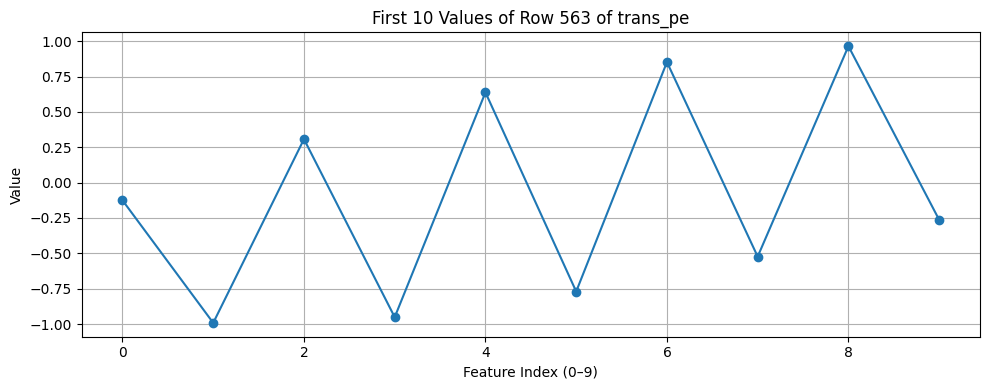

First 10 values of the 563rd row of trans_input:
[ 2.9922767   0.8849242  -1.2345653  -1.6170313  -1.0009476   1.1687304
  0.46513003  0.64764273 -0.26394746  0.19055334]


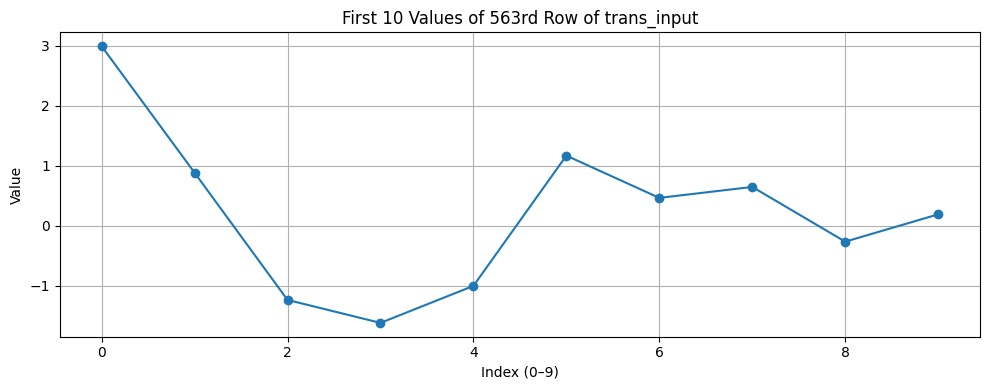

First 10 values of row 563:
tensor([ 2.8669, -0.1072, -0.9274, -2.5687, -0.3633,  0.3984,  1.3172,  0.1242,
         0.7007, -0.0728])


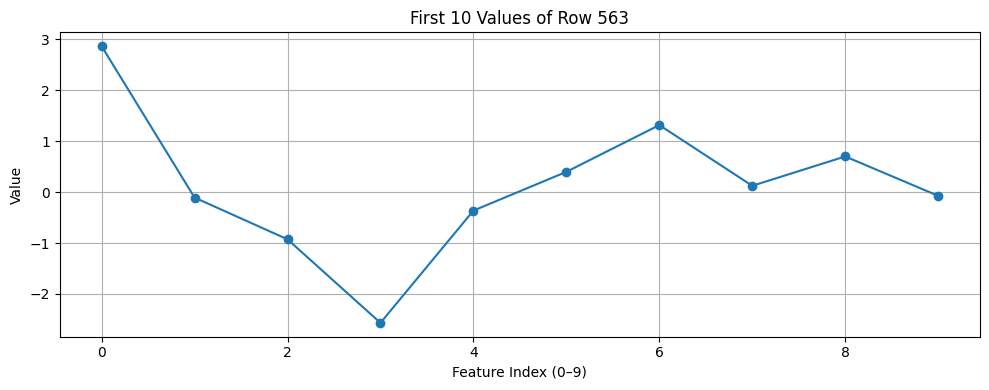

In [ ]:

import torch
import matplotlib.pyplot as plt

# Assuming trans_pe is your tensor of shape [1125, 1, 256]
row_index = 563
selected_row = trans_pe[row_index, 0, :]  # Shape: [256]

# Get only the first 10 values
first_10_values = selected_row[:10]

# Print the first 10 values
print(f"First 10 values of row {row_index} of trans_pe:")
print(first_10_values)

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_10_values.numpy(), marker='o')  # marker='o' adds dots on each point
plt.title(f"First 10 Values of Row {row_index} of trans_pe")
plt.xlabel("Feature Index (0–9)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

import torch
import matplotlib.pyplot as plt

# Get the first row
row563 = trans_input[563]  # shape: [1, 256]

# Optionally remove singleton dimension
row563_flat = row563.squeeze(0)  # shape: [256]

# Save to file
torch.save(row563_flat, 'row563.pt')

# Load the saved tensor
row563_loaded = torch.load('row563.pt')

# Convert to NumPy for plotting
data = row563_loaded.numpy()

# Get only the first 10 values
first_10_values = data[:10]

# Print only the first 10 values
print("First 10 values of the 563rd row of trans_input:")
print(first_10_values)

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_10_values, marker='o')
plt.title('First 10 Values of 563rd Row of trans_input')
plt.xlabel('Index (0–9)')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()





import torch
import matplotlib.pyplot as plt

row_index = 563
selected_row = input_w_pos[row_index, 0, :]  # Shape: [256]

# Slice the first 10 values
first_10_values = selected_row[:10]

# Print only the first 10 values
print(f"First 10 values of row {row_index}:")
print(first_10_values)

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_10_values.numpy(), marker='o')  # Optional: marker for clarity
plt.title(f"First 10 Values of Row {row_index}")
plt.xlabel("Feature Index (0–9)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()






First 10 values of row 1124 of trans_pe:
tensor([-3.0199e-07,  1.0000e+00, -7.4609e-01,  6.6584e-01, -1.0000e+00,
        -6.6518e-04, -8.0673e-01, -5.9092e-01, -3.8176e-01, -9.2426e-01])


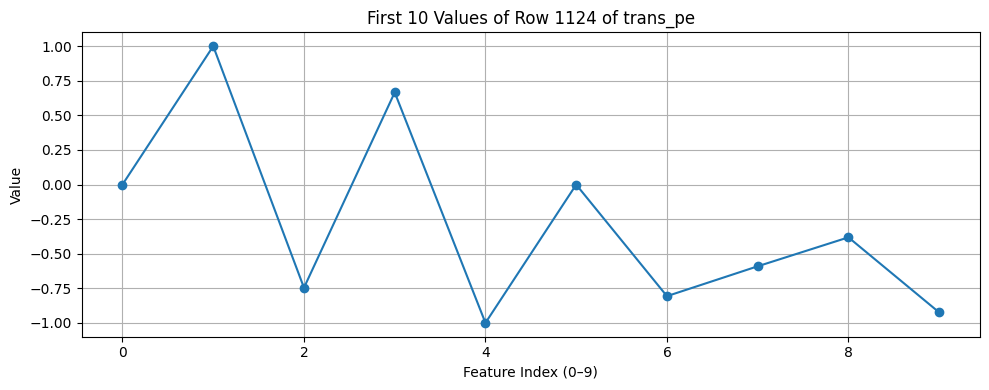

First 10 values of the 563rd row of trans_input:
[ 1.0754049   0.07449706  0.14083147 -0.49832204 -0.4568253   0.1372934
 -0.43635172 -0.7678282  -0.44009763 -0.6782833 ]


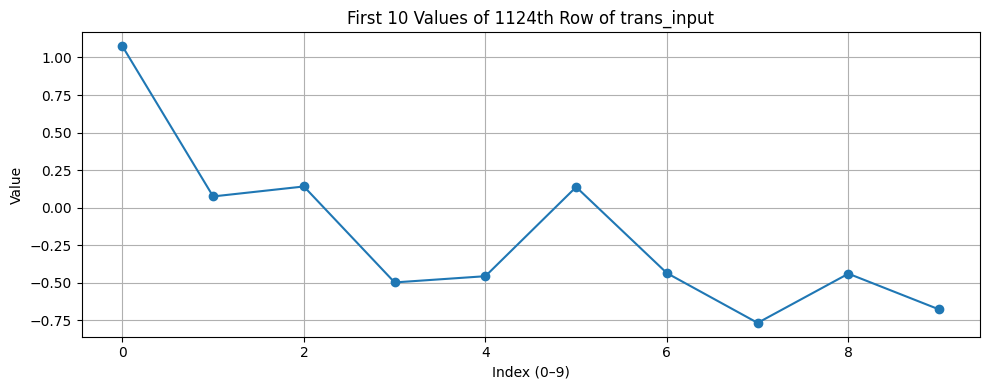

First 10 values of row 1124:
tensor([ 1.0754,  1.0745, -0.6053,  0.1675, -1.4568,  0.1366, -1.2431, -1.3588,
        -0.8219, -1.6025])


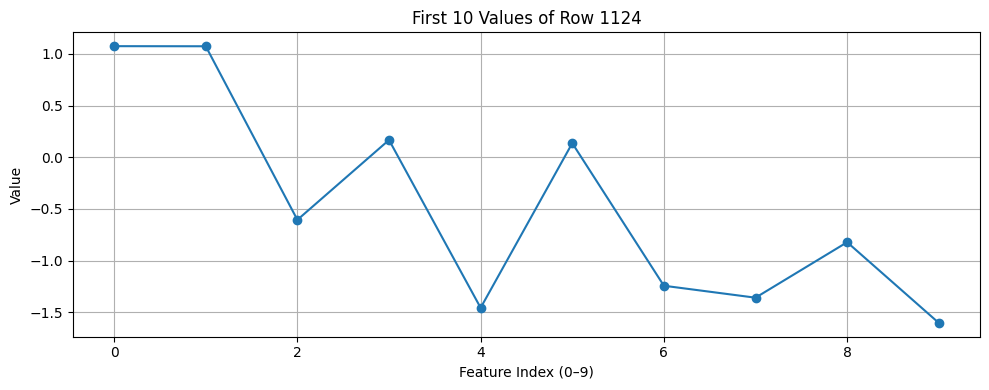

In [ ]:

import torch
import matplotlib.pyplot as plt

# Assuming trans_pe is your tensor of shape [1125, 1, 256]
row_index = 1124
selected_row = trans_pe[row_index, 0, :]  # Shape: [256]

# Get only the first 10 values
first_10_values = selected_row[:10]

# Print the first 10 values
print(f"First 10 values of row {row_index} of trans_pe:")
print(first_10_values)

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_10_values.numpy(), marker='o')  # marker='o' adds dots on each point
plt.title(f"First 10 Values of Row {row_index} of trans_pe")
plt.xlabel("Feature Index (0–9)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

import torch
import matplotlib.pyplot as plt

# Get the first row
row1124 = trans_input[1124]  # shape: [1, 256]

# Optionally remove singleton dimension
row1124_flat = row1124.squeeze(0)  # shape: [256]

# Save to file
torch.save(row1124_flat, 'row1124.pt')

# Load the saved tensor
row1124_loaded = torch.load('row1124.pt')

# Convert to NumPy for plotting
data = row1124_loaded.numpy()

# Get only the first 10 values
first_10_values = data[:10]

# Print only the first 10 values
print("First 10 values of the 563rd row of trans_input:")
print(first_10_values)

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_10_values, marker='o')
plt.title('First 10 Values of 1124th Row of trans_input')
plt.xlabel('Index (0–9)')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()





import torch
import matplotlib.pyplot as plt

row_index = 1124
selected_row = input_w_pos[row_index, 0, :]  # Shape: [256]

# Slice the first 10 values
first_10_values = selected_row[:10]

# Print only the first 10 values
print(f"First 10 values of row {row_index}:")
print(first_10_values)

# Plot only the first 10 values
plt.figure(figsize=(10, 4))
plt.plot(first_10_values.numpy(), marker='o')  # Optional: marker for clarity
plt.title(f"First 10 Values of Row {row_index}")
plt.xlabel("Feature Index (0–9)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()




